In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as st

In [2]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

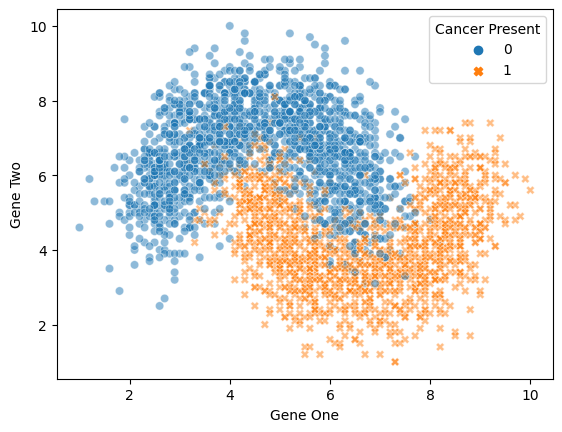

In [6]:
sns.scatterplot(data=df, x="Gene One", y="Gene Two", hue = "Cancer Present", alpha = 0.5, style='Cancer Present')

In [7]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)
predict = knn_model.predict(scaled_X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_test, predict)

array([[426,  44],
       [ 34, 396]], dtype=int64)

In [19]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



In [22]:
accuracy_score(y_test, predict)
1 - accuracy_score(y_test, predict)

0.08666666666666667

In [23]:
test_error_rates = []
for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scaled_X_train, y_train)
    predict = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, predict)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K NEIGHBORS')

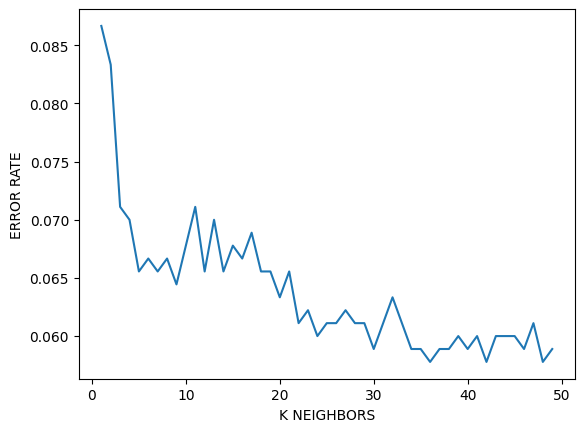

In [25]:
plt.plot(range(1,50), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K NEIGHBORS')

Pipeline y GridSearch

In [27]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [28]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [31]:
operations = [('scaler', scaler), ('knn', knn)]

In [29]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline(steps=operations)

In [33]:
grid_params = {
    'knn__n_neighbors': list(range(1, 50)),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': list(range(1, 50)),
    'knn__p': [1, 2]
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid_search = GridSearchCV(pipe, param_grid=grid_params, cv=5, scoring='accuracy')

In [36]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

In [ ]:
model = grid_search.best_estimator_

In [ ]:
predict = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predict))

In [ ]:
new_patient = [[3.8, 3.4, 1.4, 0.2]]

In [ ]:
model.predict_proba(new_patient)